In [1]:
# importing data
import pandas as pd
import operator
ramen_data = pd.read_csv("The_Ramen_Rater.csv", encoding = "ISO-8859-1", engine='python')


In [2]:
#This prints the columns and rows of the data and the numbers of columns and rows
ramen_data

,Review #,Brand,Variety,Style,Country,Stars
0,3400,EDO Pack,Kumamoto Flavour Noodles,Cup,Hong Kong,1
1,3399,Pan Mee,Goreng Dried Chili Shrimp Flavour,Pack,Malaysia,5
2,3398,Paldo,King Lid Ramen Noodle Soup,Pack,South Korea,5
3,3397,Nissin Miojo,Cremoso Carno Com Chili,Pack,Brazil,2
4,3396,Samyang Foods,Cham Ramen Big Bowl,Bowl,South Korea,2.25
...,...,...,...,...,...,...
3395,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3396,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
3397,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
3398,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


In [3]:
#Cleaning
"""Changing NR to 0.0 and Unrated to 0.0 using the keyword replace because there is actually no reviews
given. However, the problem of a zero review could be the ramen taste bad rather than not rated which
can mean it could be good or bad tasting and the reviewers did not mention."""
ramen_data = ramen_data.replace('NR', 0.0)
ramen_data = ramen_data.replace('Unrated', 0.0)


In [4]:
##Changing Review # object type to int using the keyword astype
ramen_data["Review #"]= ramen_data['Review #'].astype('int')

In [5]:
"""Printing of the data is between index 787 to 795 because this is where errors on the stars since 
3.5/2.5 cannot be converted to float. Therefore, sliced feature was used to look at where the problems
are located.""" 
ramen_data[787: 795]

,Review #,Brand,Variety,Style,Country,Stars
787,2613,Nissin,Raoh Backfat Rich Shoyu Ramen,Bowl,Japan,5
788,2612,Nona Lim,Laksa Rice Noodles + Thai Curry & Lime Broth,Pack,United States,3.5/2.5
789,2611,Nona Lim,Tokyo Ramen + Miso Ramen Broth,Pack,United States,4/4
790,2610,Nona Lim,Whole Wheat Ramen + Spicy Szechuan Broth,Pack,United States,5/5
791,2609,Nona Lim,Pad Thai Rice Noodles + Vietnamese Pho Broth,Pack,United States,4.5/5
792,2608,Nona Lim,Hakata Ramen + Thai Curry & Lime Broth,Pack,United States,5/2.5
793,2607,Nona Lim,Hakata Ramen + Miso Ramen Broth,Pack,United States,5/4
794,2606,Nona Lim,Pad See Ew Rice Noodleds + Spicy Szechuan Broth,Pack,United States,4.25/5


In [6]:
""""Replaced features was used to correct all fractions to numerals. The ramen data was again printed
between 787 to 795 using the slice feature. This is verify that the replacement was done."""
ramen_data = ramen_data.replace('5/5', 5)
ramen_data = ramen_data.replace('4.5/5', 4.5)
ramen_data = ramen_data.replace('5/2.5', 2.5)
ramen_data = ramen_data.replace('5/4', 4)
ramen_data = ramen_data.replace('4.25/5', 4.25)
ramen_data = ramen_data.replace('3.5/2.5', 3.5)
ramen_data = ramen_data.replace('4/4', 4)
ramen_data[787:795]

,Review #,Brand,Variety,Style,Country,Stars
787,2613,Nissin,Raoh Backfat Rich Shoyu Ramen,Bowl,Japan,5
788,2612,Nona Lim,Laksa Rice Noodles + Thai Curry & Lime Broth,Pack,United States,3.5
789,2611,Nona Lim,Tokyo Ramen + Miso Ramen Broth,Pack,United States,4
790,2610,Nona Lim,Whole Wheat Ramen + Spicy Szechuan Broth,Pack,United States,5
791,2609,Nona Lim,Pad Thai Rice Noodles + Vietnamese Pho Broth,Pack,United States,4.5
792,2608,Nona Lim,Hakata Ramen + Thai Curry & Lime Broth,Pack,United States,2.5
793,2607,Nona Lim,Hakata Ramen + Miso Ramen Broth,Pack,United States,4
794,2606,Nona Lim,Pad See Ew Rice Noodleds + Spicy Szechuan Broth,Pack,United States,4.25


In [7]:
"""Changing values of Stars object type to float used the astype. This is for consistency
and for the ability to rank the favorite and least favorite of the ramen noodles"""
ramen_data["Stars"]= ramen_data['Stars'].astype('float')

In [8]:
#Printing was done to verify that all the numbers became float
ramen_data[787:795]

,Review #,Brand,Variety,Style,Country,Stars
787,2613,Nissin,Raoh Backfat Rich Shoyu Ramen,Bowl,Japan,5.00
788,2612,Nona Lim,Laksa Rice Noodles + Thai Curry & Lime Broth,Pack,United States,3.50
789,2611,Nona Lim,Tokyo Ramen + Miso Ramen Broth,Pack,United States,4.00
790,2610,Nona Lim,Whole Wheat Ramen + Spicy Szechuan Broth,Pack,United States,5.00
791,2609,Nona Lim,Pad Thai Rice Noodles + Vietnamese Pho Broth,Pack,United States,4.50
792,2608,Nona Lim,Hakata Ramen + Thai Curry & Lime Broth,Pack,United States,2.50
793,2607,Nona Lim,Hakata Ramen + Miso Ramen Broth,Pack,United States,4.00
794,2606,Nona Lim,Pad See Ew Rice Noodleds + Spicy Szechuan Broth,Pack,United States,4.25


In [9]:
#The ramen data was sorted based on brands
ramen_data_sort = ramen_data.sort_values('Brand')

In [10]:
#This verifies that the brands were sorted
ramen_data_sort[1:10]

,Review #,Brand,Variety,Style,Country,Stars
1276,2124,7 Select,Nissin Instant Noodles Tom Yum Seafood Creamy ...,Bowl,Thailand,3.50
1283,2117,7 Select,Nissin Instant Noodles Shrimp Ma Nao Lui Suan ...,Bowl,Thailand,3.75
1697,1703,7 Select/Nissin,Super Tom Yum Shrimp,Cup,Thailand,3.50
98,3302,7-Eleven / Nissin,Mouko Tanmen Nakamoto,Cup,Japan,4.25
2109,1291,A-One,M Ly Instant Noodles M Tm Shrimp Flavor,Cup,Vietnam,3.25
1836,1564,A-One,M Ly Instant Noodles M Th?t X o Pork Flavor,Cup,Vietnam,3.00
1767,1633,A-One,Mi Ly Instant Noodles Mi Bo Beef Flavor,Cup,Vietnam,3.50
1731,1669,A-One,Mi Ly Instant Noodles Mi Chay Vegetarian Flavor,Cup,Vietnam,1.25
475,2925,A-Sha,Dan Zai Noodle,Pack,Taiwan,5.00


In [11]:
#Usng the pivot table feature. All the brands were counted.
dups_brand = ramen_data.pivot_table(index=['Brand'], aggfunc='size')
print(dups_brand)

Brand
1 To 3 Noodles       1
7 Select             2
7 Select/Nissin      1
7-Eleven / Nissin    1
A-One                4
                    ..
Zombear              1
Zow Zow              1
iMee                 4
iNoodle              2
nunu                 1
Length: 500, dtype: int64


In [12]:
"""This evaluates the count, mean, minimum, maximum, std, and percentages of the ramen 
brands. There are 500 different brands of ramen in the survey. The outlier brand
is Nissin which has 460 reviews. """
dups_brand.describe()

count    500.000000
mean       6.800000
std       23.769096
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      460.000000
dtype: float64

In [13]:
"""Picking out the most popular brand using for loop and if else statement. The 3 most popular brand
are Nissin 460, Maruchan 120, and Nonshim 113."""
for a, b in dups_brand.items():
    if b <= 50:
        continue
    else:
        print(a, b)     

Indomie 56
Mama 71
Maruchan 120
Myojo 96
Nissin 460
Nongshim 113
Paldo 76
Samyang Foods 93
Sapporo Ichiban 54


In [14]:
"""Using the pivot table feature for the Variety, enables the analyst to know how many commonality 
of varieties that are being compared.There are 3171 flavor varieties of ramen""" 
dups_variety = ramen_data.pivot_table(index=['Variety'], aggfunc='size')
print(dups_variety)

Variety
"A" Series Artificial Chicken                      1
"A" Series Artificial Hot Beef                     1
"A" Series Vegetarian                              1
1 Step-1 Minute Asian Noodles Kung Pao             1
1 Step-1 Minute Asian Noodles Lemongrass Ginger    1
                                                  ..
Zzaldduck Buldak Bokkeummyun Snack                 1
chicken                                            1
dried Mix Noodles Soya Bean Paste                  1
spicy Pad Thai Instant Noodles & Sauce             1
tom Yum Kung Rice Vermicelli                       1
Length: 3171, dtype: int64


In [15]:
"""This evaluates the count, mean, minimum, maximum, std, and percentages of the varieties
of ramen. There are 3171 varieties of ramen in the survey. The maximum similar preference
of a reviewer is 7 times which not easy to ascertain if the ramen has a good review (stars
) or not and will automatically be a favorite ramen. Using the max information, I would
like to know what are the popular flavors."""
dups_variety.describe()

count    3171.000000
mean        1.072217
std         0.389314
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
dtype: float64

In [16]:
"""Picking out the most popular variety using for loop and if else statement. The most popular flavors
are Beef 7, Chicken 7, Miso Ramen 7, Yakisoba, Artificial Chicken 6, and Vegetable 6. These flavors
are very generic. These data is insufficient to conclude which brand and flavor is the most popular
choice for ramen since there are 3171 different flavors."""
for a, b in dups_variety.items():
    if b <= 5:
        continue
    else:
        print(a, b)     

Artificial Chicken 6
Beef 7
Chicken 7
Miso Ramen 7
Vegetable 6
Yakisoba 7


In [17]:
"""Using the pivot table feature. All the different styles were counted and what is the most
popular style used. The three most popular style is pack, followed by bowls, then cups."""
dups_style = ramen_data.pivot_table(index=['Style'], aggfunc='size')
print(dups_style)

Style
Bar              1
Bowl           655
Box             48
Can              1
Cup            593
Pack          1948
Restaurant       3
Tray           151
dtype: int64


In [18]:
"""Using the pivot table feature. All the countries were counted. The conclusion for this
data is the big consumption of ramen is from Asia. The bulk of the reviews were from Japan
which is 606 and which is understandable because ramen was first introduced in Japan."""

dups_country = ramen_data.pivot_table(index=['Country'], aggfunc='size')
print(dups_country)

Country
Australia          25
Bangladesh         12
Brazil             20
Cambodia            5
Canada             56
China             217
Colombia            6
Dubai               3
Estonia             2
Fiji                4
Finland             3
France              4
Germany            28
Ghana               2
Holland             4
Hong Kong         159
Hungary             9
India              41
Indonesia         152
Italy               4
Japan             606
Malaysia          190
Mexico             32
Myanmar            14
Nepal              14
Netherlands        16
New Zealand         1
Nigeria             2
Pakistan            9
Peru                3
Philippines        51
Phlippines          1
Poland              6
Portugal            1
Russia              5
Sarawak             5
Singapore         136
South Korea       383
Spain               2
Sweden              3
Taiwan            351
Thailand          208
UK                 69
USA                 1
Ukraine             3
Un

In [19]:
"""This evaluates the count, mean, minimum, maximum, std, and percentages of the countries
producing ramen. There are 48 countries that produces ramen in the survey. The outlier 
is Japan which has 606 reviews. """
dups_country.describe()

count     48.000000
mean      70.833333
std      129.973374
min        1.000000
25%        3.000000
50%        9.000000
75%       59.250000
max      606.000000
dtype: float64

In [36]:
"""Picking out the top 4 country that consumes most ramen using for loop and if else statement.
The 4 countries are Japan 606, United States 419, South Korea 383, and Taiwan 351."""
for a, b in dups_country.items():
    if b <= 350:
        continue
    else:
        print(a, b)  

Japan 606
South Korea 383
Taiwan 351
United States 419


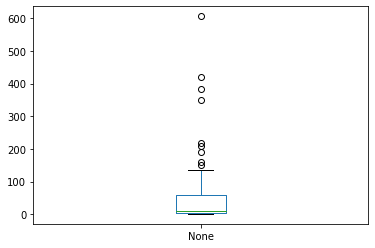

In [40]:
import matplotlib
dups_country.plot(kind = 'box')

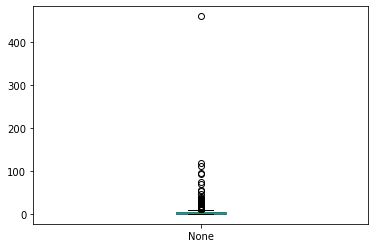

In [41]:
dups_brand.plot(kind = "box")